# Importing the Libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [119]:
dataset = pd.read_csv('bank-additional-full.csv', sep=';', quotechar='"')

In [120]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [121]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [122]:
dataset.shape

(41188, 21)

### Determining the number of missing values

In [123]:
dataset.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [124]:
dataset_copy = dataset.copy()

In [125]:
def change_column_type_object_to_categorical(df):
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    for column in object_columns:
        df[column] = pd.Categorical(df[column])

In [126]:
change_column_type_object_to_categorical(dataset_copy)
dataset_copy.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

### Reordering the columns order as numerical to categorical

In [127]:
# Separate numerical and categorical columns
numerical_columns = dataset_copy.select_dtypes(include='number').columns.tolist()
categorical_columns = dataset_copy.select_dtypes(exclude='number').columns.tolist()

# Reorder columns
new_order = numerical_columns + categorical_columns
dataset_copy = dataset_copy[new_order]
dataset_copy.dtypes

age                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
poutcome          category
y                 category
dtype: object

## Required Function definitions:

In [128]:
def visualize_features(df,column_name):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column_name, kde=True, color='skyblue')
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [129]:
def visualize_target_feature(df,column_name):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column_name, hue='y', multiple='stack', palette='Set2')
    plt.title(f"Distribution of 'y' within {column_name} Groups")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [130]:
def visualize_outliers(df, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f"Boxplot of {column_name} (with Outliers)")
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()

In [131]:
def visualize(df,column_name):
    visualize_features(df,column_name)
    visualize_target_feature(df,column_name)
    visualize_outliers(df, column_name)

In [132]:
def remove_outliers_by_quantiles(df, column_name, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)
    df.drop(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index, inplace=True)

In [133]:
def extract_feature_by_thresholds(df,col_name,thresholds):
    labels = []
    for i in range(len(thresholds) - 1):
        label = f"{col_name}_({thresholds[i]}_{thresholds[i+1]}]"
        mask = (df[col_name] > thresholds[i]) & (df[col_name] <= thresholds[i+1])
        df.loc[mask, f'{col_name}_group'] = label
        labels.append(label)

In [134]:
def print_extract_feature_by_thresholds(df,col_name,thresholds):
    percentages = {}
    total_samples = len(df)
    for i in range(len(thresholds) - 1):
        lower_bound = thresholds[i]
        upper_bound = thresholds[i + 1]
        mask = (df[col_name] > lower_bound) & (df[col_name] <= upper_bound)
        count = df.loc[mask].shape[0]
        percentage = (count / total_samples)
        rounded_percentage = round(percentage, 4)
        print(f"({lower_bound}_{upper_bound}] = {rounded_percentage}, samples:{count}")

In [135]:
def calculate_success_rate(df, feature_column, target_column, lower_bound,upper_bound):
    # Filter the DataFrame for the specific condition
    filtered_df = df[(df[feature_column] >= lower_bound) & (df[feature_column] <= upper_bound)].copy()
    # Group by the feature column and calculate the rate of 'yes' for each unique value
    grouped = filtered_df.groupby(feature_column)[target_column].apply(lambda x: (x == 'yes').mean())
    success_rate = grouped.mean()
    return grouped, success_rate


In [136]:
def generate_start_end_threshold(df, col_name, increment_range):
    start = df[col_name].min() - (df[col_name].min())%increment_range
    end = df[col_name].max() - (df[col_name].max())%increment_range + increment_range
    return start, end

In [137]:
def generate_threshold(df,col_name,increment_range):
    start, end = generate_start_end_threshold(df,col_name,increment_range)
    thresholds = []
    threshold = start
    while threshold <= end:
        thresholds.append(threshold)
        threshold += increment_range
    return thresholds


In [138]:
def correlation_heatmap(df,numerical_col):
    ## taking from https://github.com/bowcai/bank-analysis/blob/main/bank-analysis.ipynb
    fig= plt.figure(figsize=(8,8))

    corr = df[numerical_col].corr()
    mask = np.triu(df[numerical_col].corr())

    axes = fig.add_axes([0, 0, 1, 1])
    sns.heatmap(corr, annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='viridis',
            linecolor='white', cbar_kws= {'orientation': 'vertical'}, ax=axes)

## Handling outliers for numerical features

In [139]:
for col_name in numerical_columns:
    remove_outliers_by_quantiles(dataset_copy,col_name)

## Exploring the numerical columns

##### 1-) "Age"

In [ ]:
visualize(dataset_copy,'age')

##### 2-) "Duration"

In [ ]:
visualize(dataset_copy,'duration')

##### 3-) "Campaign"

In [ ]:
visualize(dataset_copy,'campaign')

##### 4-) "pdays"

In [ ]:
visualize(dataset_copy,'pdays')

##### 5-) "previous"

In [ ]:
visualize(dataset_copy,'previous')

##### 6-) "emp.var.rate"

In [ ]:
visualize(dataset_copy,'emp.var.rate')

##### 7-) "cons.price.idx"

In [ ]:
visualize(dataset_copy,'cons.price.idx')

##### 8-) "cons.conf.idx"

In [ ]:
visualize(dataset_copy,'cons.conf.idx')

##### 9-) "euribor3m"

In [ ]:
visualize(dataset_copy,'euribor3m')

##### 10-) "nr.employed"

In [ ]:
visualize(dataset_copy,'nr.employed')

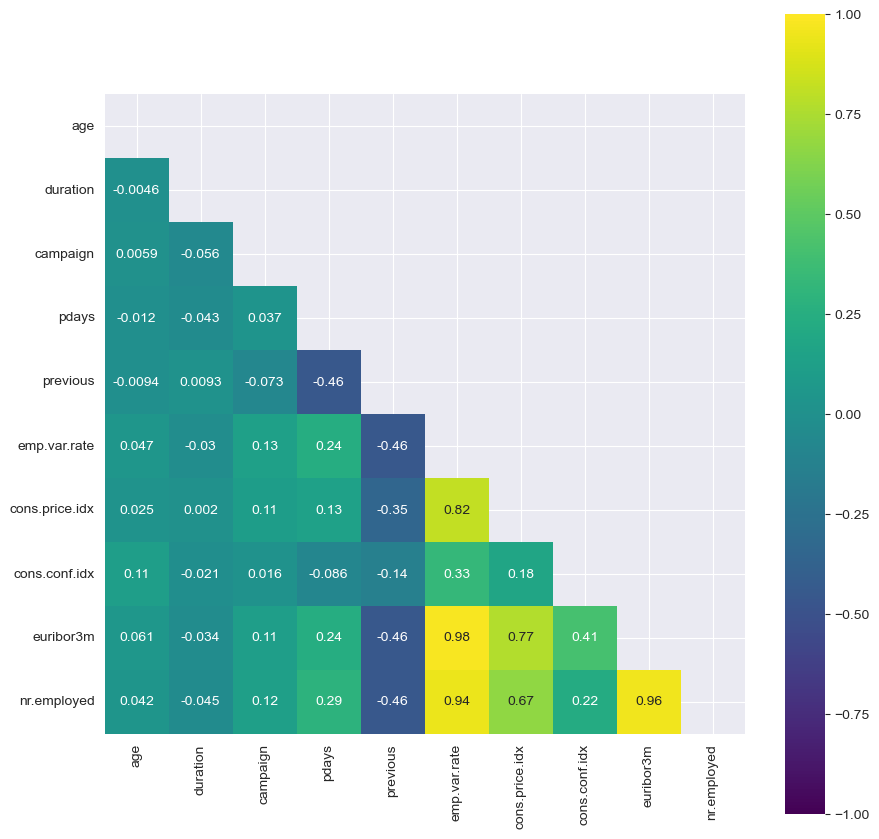

In [150]:
correlation_heatmap(dataset_copy,numerical_columns)

In [151]:
# Since there is a huge correlation between emp.var.rate and (cons.price.idx/euribor3m/nr.employed)
# we drop those features
dataset_copy = dataset_copy.drop(['cons.price.idx', 'euribor3m', 'nr.employed'], axis=1)
numerical_columns = dataset_copy.select_dtypes(include='number').columns.tolist()

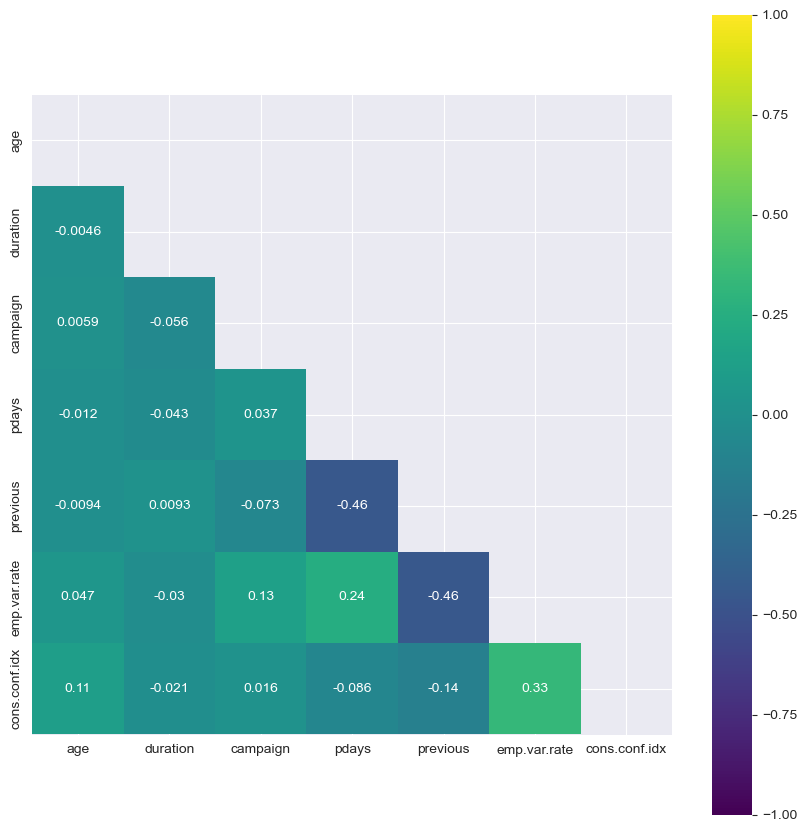

In [152]:
correlation_heatmap(dataset_copy,numerical_columns)

In [153]:
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx']

## Feature Extraction for numerical features

##### 1-) "Age"

In [154]:
age_threshold = generate_threshold(dataset_copy,'age',5)
print(age_threshold)

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]


In [214]:
print_extract_feature_by_thresholds(dataset_copy,'age',age_threshold)

(10_30] = 0.1695, samples:6326
(30_35] = 0.2263, samples:8447
(35_75] = 0.6043, samples:22557


In [156]:
extract_feature_by_thresholds(dataset_copy,'age',age_threshold)

In [157]:
dataset_copy['age_group'].value_counts()

age_group
age_(30_35]    8447
age_(35_40]    6806
age_(40_45]    5273
age_(25_30]    5188
age_(45_50]    4345
age_(50_55]    3352
age_(55_60]    2423
age_(20_25]    1138
age_(60_65]     198
age_(65_70]     131
age_(70_75]      29
Name: count, dtype: int64

##### 2-) "duration"

In [158]:
duration_threshold = generate_threshold(dataset_copy,'duration',100)
print(duration_threshold)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]


In [159]:
print_extract_feature_by_thresholds(dataset_copy,'duration',duration_threshold)

(0_100] = 0.2428, samples:9065
(100_200] = 0.3155, samples:11777
(200_300] = 0.1759, samples:6568
(300_400] = 0.099, samples:3695
(400_500] = 0.055, samples:2055
(500_600] = 0.0359, samples:1341
(600_700] = 0.025, samples:935
(700_800] = 0.0172, samples:643
(800_900] = 0.0116, samples:434
(900_1000] = 0.0081, samples:304
(1000_1100] = 0.0063, samples:237
(1100_1200] = 0.0048, samples:180
(1200_1300] = 0.0026, samples:96


In [160]:
extract_feature_by_thresholds(dataset_copy,'duration',duration_threshold)

In [161]:
dataset_copy['duration_group'].value_counts()

duration_group
duration_(100_200]      11777
duration_(0_100]         9065
duration_(200_300]       6568
duration_(300_400]       3695
duration_(400_500]       2055
duration_(500_600]       1341
duration_(600_700]        935
duration_(700_800]        643
duration_(800_900]        434
duration_(900_1000]       304
duration_(1000_1100]      237
duration_(1100_1200]      180
duration_(1200_1300]       96
Name: count, dtype: int64

##### 3-) "pdays"

In [162]:
dataset_copy['pdays'].value_counts()

pdays
999    36566
3        261
6        174
4         76
12        36
9         34
10        31
7         30
5         29
13        24
11        20
15        17
14        13
16         7
8          6
22         2
18         1
25         1
26         1
17         1
Name: count, dtype: int64

In [163]:
dataset_copy['pdays_group'] = dataset_copy['pdays']
dataset_copy.loc[dataset_copy['pdays'] <= 100, 'pdays_group'] = 0
dataset_copy.loc[dataset_copy['pdays'] > 100, 'pdays_group'] = 1

In [164]:
dataset_copy['pdays_group'].value_counts()

pdays_group
1    36566
0      764
Name: count, dtype: int64

##### 4-) "emp.var.rate"

In [206]:
dataset_copy['emp.var.rate'].value_counts()

emp.var.rate
 1.4    15406
-1.8     7986
 1.1     7594
-0.1     3597
-2.9     1516
-1.7      556
-3.4      523
-3.0      142
-0.2       10
Name: count, dtype: int64

In [165]:
dataset_copy['emp.var.rate_sign'] = dataset_copy['emp.var.rate']
dataset_copy.loc[dataset_copy['emp.var.rate'] < 0, 'emp.var.rate_sign'] = -1    # negative employment variation rate
dataset_copy.loc[dataset_copy['emp.var.rate'] > 0, 'emp.var.rate_sign'] = 1     # positive employment variation rate

In [166]:
dataset_copy['emp.var.rate_sign'].value_counts()

emp.var.rate_sign
 1.0    23000
-1.0    14330
Name: count, dtype: int64

##### 5-) "cons.conf.idx"

In [167]:
cons_conf_idx_threshold = generate_threshold(dataset_copy,'cons.conf.idx',5)
print(cons_conf_idx_threshold)

[-50.0, -45.0, -40.0, -35.0, -30.0, -25.0]


In [168]:
print_extract_feature_by_thresholds(dataset_copy,'cons.conf.idx',cons_conf_idx_threshold)

(-50.0_-45.0] = 0.2107, samples:7866
(-45.0_-40.0] = 0.4057, samples:15143
(-40.0_-35.0] = 0.3433, samples:12814
(-35.0_-30.0] = 0.0342, samples:1275
(-30.0_-25.0] = 0.0062, samples:232


In [169]:
extract_feature_by_thresholds(dataset_copy,'cons.conf.idx',cons_conf_idx_threshold)

In [170]:
dataset_copy['cons.conf.idx_group'].value_counts()

cons.conf.idx_group
cons.conf.idx_(-45.0_-40.0]    15143
cons.conf.idx_(-40.0_-35.0]    12814
cons.conf.idx_(-50.0_-45.0]     7866
cons.conf.idx_(-35.0_-30.0]     1275
cons.conf.idx_(-30.0_-25.0]      232
Name: count, dtype: int64

## Encoding the numerical features

In [171]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
month                  category
day_of_week            category
poutcome               category
y                      category
age_group                object
duration_group           object
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group      object
dtype: object

In [172]:
from sklearn.preprocessing import LabelEncoder
label_encoded_features = ['age_group','duration_group','cons.conf.idx_group']
label_encoder = LabelEncoder()

for column in label_encoded_features:
    dataset_copy[column] = label_encoder.fit_transform(dataset_copy[column])

In [173]:
for column in label_encoded_features:
    print(dataset_copy[column].value_counts())

age_group
2     8447
3     6806
4     5273
1     5188
5     4345
6     3352
7     2423
0     1138
8      198
9      131
10      29
Name: count, dtype: int64
duration_group
2     11777
0      9065
5      6568
6      3695
7      2055
8      1341
9       935
10      643
11      434
12      304
1       237
3       180
4        96
Name: count, dtype: int64
cons.conf.idx_group
3    15143
2    12814
4     7866
1     1275
0      232
Name: count, dtype: int64


In [174]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
month                  category
day_of_week            category
poutcome               category
y                      category
age_group                 int32
duration_group            int32
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group       int32
dtype: object

### Dealing with the categorical columns

In [175]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

##### 1-) "job"

In [ ]:
visualize_features(dataset_copy,'job')
visualize_target_feature(dataset_copy,'job')

##### 2-) "marital"

In [ ]:
visualize_features(dataset_copy,'marital')
visualize_target_feature(dataset_copy,'marital')

##### 3-) "education"

In [ ]:
visualize_features(dataset_copy,'education')
visualize_target_feature(dataset_copy,'education')

##### 4-) "default"

In [ ]:
visualize_features(dataset_copy,'default')
visualize_target_feature(dataset_copy,'default')

##### 5-) "housing"

In [ ]:
visualize_features(dataset_copy,'housing')
visualize_target_feature(dataset_copy,'housing')

##### 6-) "loan"

In [ ]:
visualize_features(dataset_copy,'loan')
visualize_target_feature(dataset_copy,'loan')

##### 7-) "contact"

In [ ]:
visualize_features(dataset_copy,'contact')
visualize_target_feature(dataset_copy,'contact')

##### 8-) "month"

In [ ]:
visualize_features(dataset_copy,'month')
visualize_target_feature(dataset_copy,'month')

##### 9-) "day_of_week"

In [ ]:
visualize_features(dataset_copy,'day_of_week')
visualize_target_feature(dataset_copy,'day_of_week')

##### 10-) "y"

In [ ]:
visualize_features(dataset_copy,'y')

### Handling missing values

In [186]:
dataset_copy.replace('unknown', np.nan, inplace=True)
dataset_copy.fillna(dataset_copy.mode().iloc[0], inplace=True)

## Encoding the categorical dataset

In [187]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
month                  category
day_of_week            category
poutcome               category
y                      category
age_group                 int32
duration_group            int32
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group       int32
dtype: object

In [188]:
label_encoded_features = ['education','default','housing','loan','month','day_of_week','poutcome','marital','contact','y']
onehot_encoded_features = ['job']

In [189]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in label_encoded_features:
    dataset_copy[column] = label_encoder.fit_transform(dataset_copy[column])

In [190]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
for col in onehot_encoded_features:
    transformed = ohe.fit_transform(dataset_copy[[col]])
    dataset_copy[ohe.categories_[0]] = transformed.toarray()

In [191]:
dataset_copy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job,marital,education,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,261,1,999,0,1.1,-36.4,housemaid,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,149,1,999,0,1.1,-36.4,services,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,226,1,999,0,1.1,-36.4,services,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,151,1,999,0,1.1,-36.4,admin.,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56,307,1,999,0,1.1,-36.4,services,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [192]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                   int32
education                 int32
default                   int32
housing                   int32
loan                      int32
contact                   int32
month                     int32
day_of_week               int32
poutcome                  int32
y                         int32
age_group                 int32
duration_group            int32
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group       int32
admin.                  float64
blue-collar             float64
entrepreneur            float64
housemaid               float64
management              float64
retired                 float64
self-employed           float64
services                float64
student 

<Axes: >

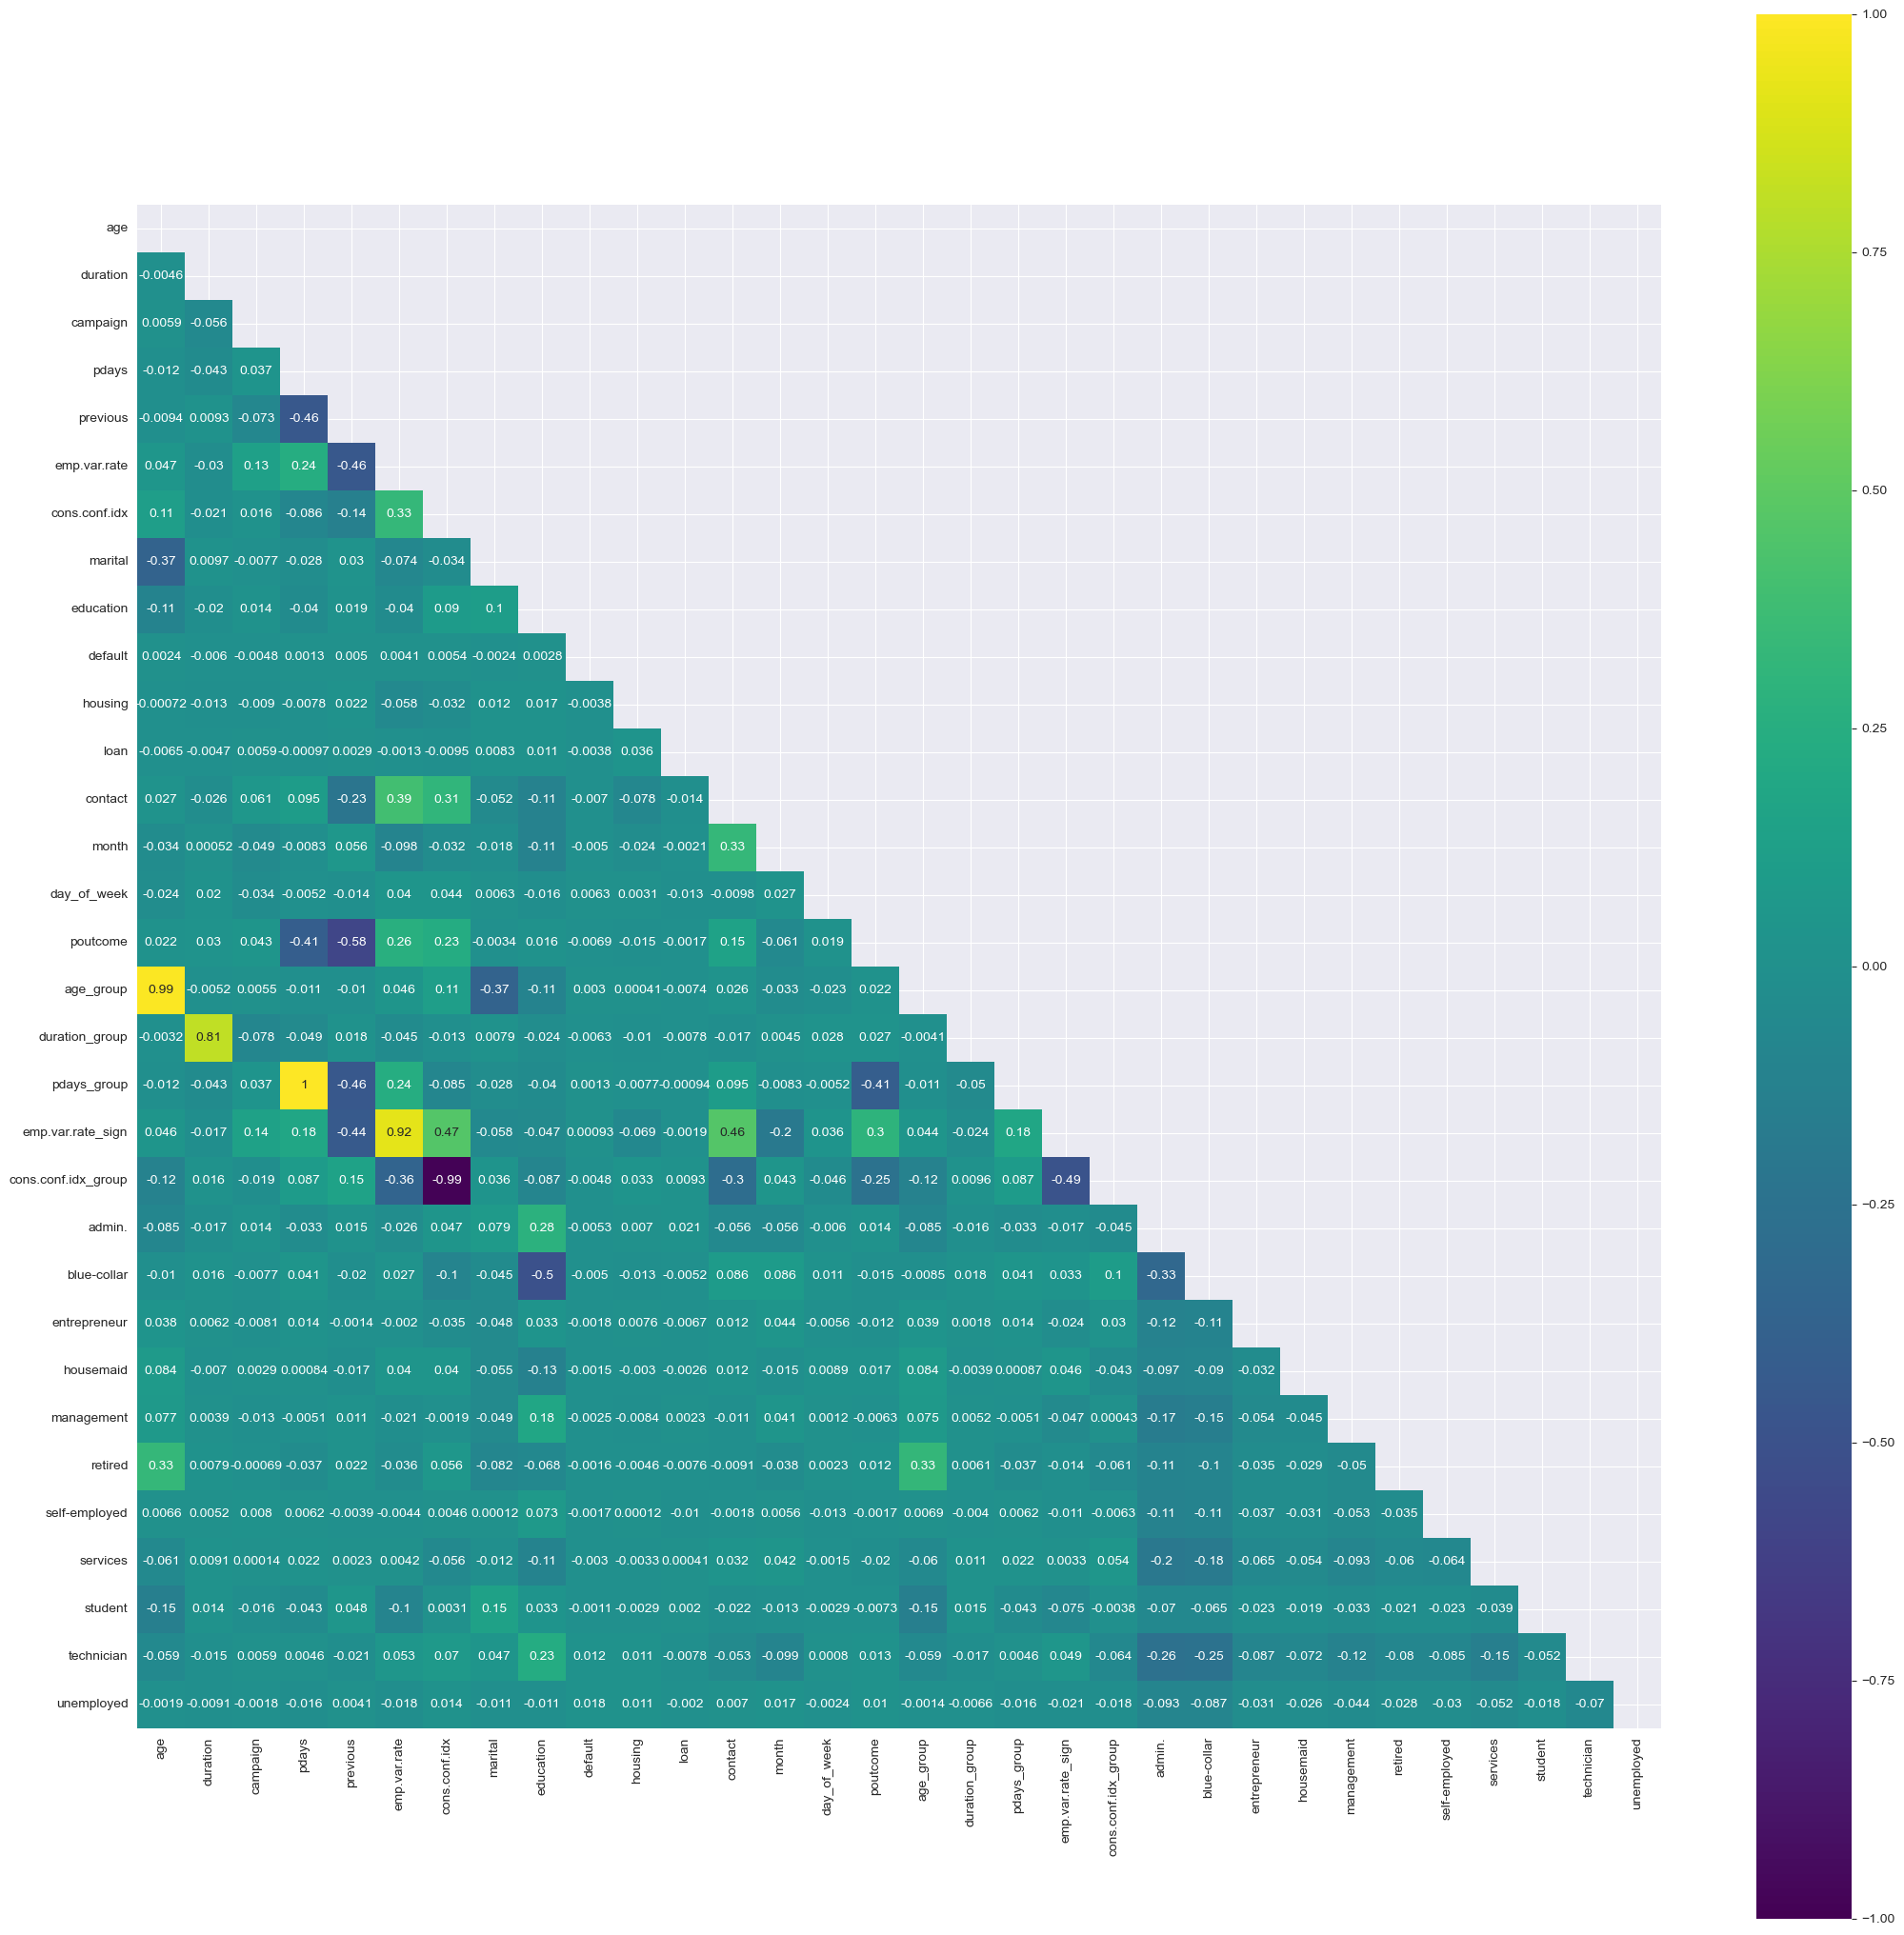

In [193]:
fig= plt.figure(figsize=(20,20))
df = dataset_copy.drop(['y','job'], axis=1)
corr = df.corr()
mask = np.triu(df.corr())

axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(corr, annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='viridis',
            linecolor='white', cbar_kws= {'orientation': 'vertical'}, ax=axes)

In [194]:
dataset_copy.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.conf.idx', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y', 'age_group',
       'duration_group', 'pdays_group', 'emp.var.rate_sign',
       'cons.conf.idx_group', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed'],
      dtype='object')

In [195]:
selected_features = ['age_group','duration_group','campaign','pdays_group','previous','emp.var.rate_sign','cons.conf.idx_group',
                     'marital','default','housing','loan','contact','month','day_of_week','poutcome','admin.', 'blue-collar', 'entrepreneur',
                     'housemaid', 'management', 'retired', 'self-employed', 'services',
                     'student', 'technician', 'unemployed','y']
dataset_selected = dataset_copy[selected_features].copy()

In [196]:
dataset_selected.head()

,age_group,duration_group,campaign,pdays_group,previous,emp.var.rate_sign,cons.conf.idx_group,marital,default,housing,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,y
0,7,5,1,1,0,1.0,2,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7,2,1,1,0,1.0,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,3,5,1,1,0,1.0,2,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,3,2,1,1,0,1.0,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7,6,1,1,0,1.0,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
for col in selected_features:
    visualize_features(dataset_selected,col)

In [198]:
dataset_selected.describe()

,age_group,duration_group,campaign,pdays_group,previous,emp.var.rate_sign,cons.conf.idx_group,marital,default,housing,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,y
count,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,...,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000,37330.000000
mean,3.360380,3.431690,2.402625,0.979534,0.127779,0.232253,2.780498,1.158344,0.000080,0.545406,...,0.036807,0.025824,0.072060,0.031476,0.035441,0.099920,0.013716,0.165015,0.023975,0.085508
std,1.917621,2.977535,2.011943,0.141590,0.369643,0.972668,0.835685,0.598627,0.008964,0.497941,...,0.188290,0.158611,0.258591,0.174603,0.184893,0.299897,0.116309,0.371199,0.152974,0.279639
min,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,-1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,6.000000,3.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,12.000000,14.000000,1.000000,2.000000,1.000000,4.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
X = dataset_copy.drop(['y','job'], axis=1)
y = dataset_selected['y']

In [200]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,marital,education,default,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,261,1,999,0,1.1,-36.4,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,149,1,999,0,1.1,-36.4,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,226,1,999,0,1.1,-36.4,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,151,1,999,0,1.1,-36.4,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56,307,1,999,0,1.1,-36.4,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [201]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

## Dealing with Imbalance dataset

In [202]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [203]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [204]:
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 34138, 1: 3192})
Counter({0: 34138, 1: 34138})


## Normatlization

In [117]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min_Max scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)